# Regresión Logística


## Importar librerías

In [1]:
from sklearn.datasets import load_digits # dataset a utilizar
import pandas as pd                      # manipulacion da datos
import matplotlib.pyplot as plt          # Visualizacion de datos
import seaborn as sns                    # Visualizacion de datos
import numpy as np                       # modificar arreglos
from sklearn.linear_model import LogisticRegression # aplicar la regresion logistica

## Carga de datos

In [2]:
# cargamos los datos de SKlearn
digits = load_digits()

In [3]:
# cargamos uno de los datos
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
# modificamos la forma del dato a 8x8 ya que la documentacion indica
# que en esa dimension se visualizan los digitos
image = np.reshape(digits.data[0],(8,8))

In [9]:
# mismo array pero esta vez 8x8
image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

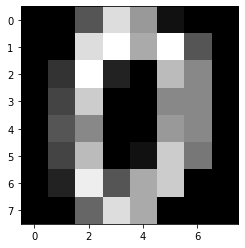

In [10]:
# mostrar la imagen en un mapa de colores gris
plt.imshow(image,cmap='gray');

La imagen muestra aparentemente un cero. Para verificarlo procedemos como sigue:

In [11]:
# Utilizamos la propiedad target
digits.target[0]

0

Efectivamente es un cero.

Probemos con el datapoint 25.

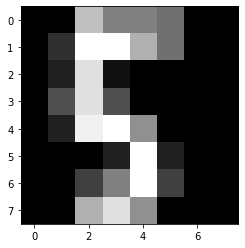

In [12]:
image = np.reshape(digits.data[25],(8,8))

plt.imshow(image,cmap='gray');

Aparentemente es el 5. Verifiquemos que sea cierto.

In [13]:
digits.target[25]

5

Efectivamente es el 5

## Split de datos en train y test

In [14]:
# libreria para dividir los datos en set de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

# creamos los sets de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [16]:
# datos de entrenamiento
x_train.shape

(1437, 64)

In [17]:
# Datos de prueba
x_test.shape

(360, 64)

## Entrenamiento de modelo

In [20]:
# instanciamos el modelo a una variable
logistic_reg = LogisticRegression()

# Entrenamiento del modelo
logistic_reg.fit(x_train,y_train)

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluación del modelo

In [21]:
# hacemos una prediccion con el set de prueba
predictions = logistic_reg.predict(x_test)

In [22]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

predictions muestra las predicciones del set de prueba. Para el primer caso predice 2, para el segundo predice 8, para el tercer 2....

In [23]:
# matriz de confusion para verificar que las predicciones son correctas
from sklearn.metrics import confusion_matrix

# compara los valores reales con los valores predichos
cm = confusion_matrix(y_test,predictions)


In [24]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Muestra las veces acertadas para cada caso entre el valor real y el valor predicho. Para el primer caso hubo un total de 27 aciertos, para el segundo caso 34 aciertos,...

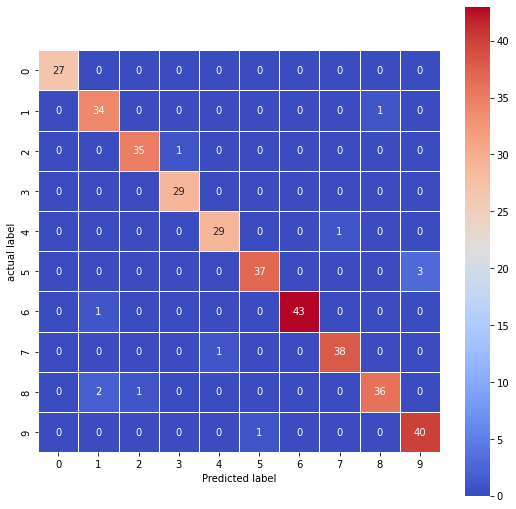

In [26]:
# tamano del grafico
plt.figure(figsize=(9,9))

# mapa de calor para distiguir mejor los valores
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')

# nombre de los ejes
plt.ylabel('actual label')
plt.xlabel('Predicted label');